# Ajustando datos a un modelo con Bayes y Metropolis 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ErrorbarContainer object of 3 artists>

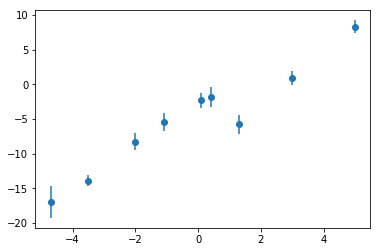

In [2]:
x_obs = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
y_obs = np.array([ -8.3,   -5.77,  -1.86, 8.3, -2.35, -16.98,  0.934, -13.89,  -5.49 ])
sigma_y_obs = np.array([-1.2,-1.36, -1.44, 0.92,-1.02, 2.3,-1.0, 0.8, -1.3])

plt.errorbar(x_obs,y_obs, yerr=sigma_y_obs, fmt='o')

Para usar Bayes planteamos la siguiente verosimilitud
$$
\mathcal{L}({x_i, y_i, \sigma_i}|m, b) = \prod_{i=1}^{N}\exp\left[-\frac{1}{2}\left(\frac{y_i - y_{model}(x_i, m, b)}{\sigma_i}\right)^2\right]
$$

In [3]:
def model(x,m,b):
    return x*m + b

def loglikelihood(x_obs, y_obs, sigma_y_obs, m, b):
    d = y_obs -  model(x_obs, m, b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(m, b):
    p = -np.inf
    if m < 10 and m >-10 and b >-20 and b<20:
        p = 0.0
    return p


In [4]:
N = 50000
lista_m = [np.random.random()]
lista_b = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]

sigma_delta_m = 0.2
sigma_delta_b = 1.0

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)

    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[i-1], lista_b[i-1]) + logprior(lista_m[i-1], lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_m, propuesta_b) + logprior(propuesta_m, propuesta_b)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
logposterior = np.array(logposterior)

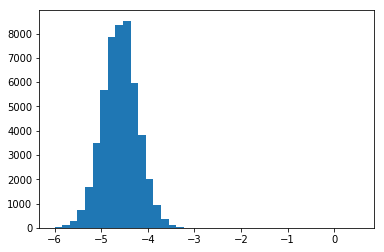

In [5]:
_=plt.hist(lista_b, bins=40)

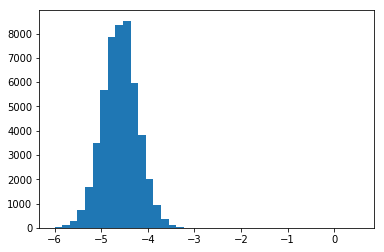

In [6]:
_=plt.hist(lista_b, bins=40)

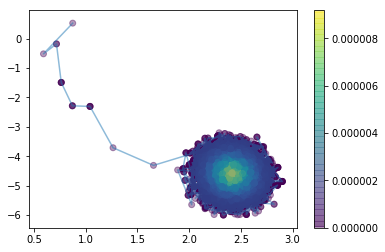

In [7]:
plt.plot(lista_m, lista_b, alpha=0.5)
plt.scatter(lista_m, lista_b, alpha=0.4, c=np.exp(logposterior))
plt.colorbar()

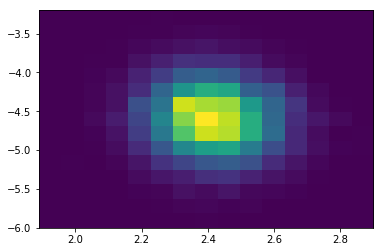

In [14]:
_=plt.hist2d(lista_m[100:], lista_b[100:], bins=15)

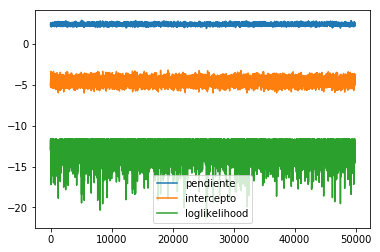

In [15]:
plt.plot(lista_m[100:], label='pendiente')
plt.plot(lista_b[100:], label='intercepto')
plt.plot(logposterior[100:], label='loglikelihood')
plt.legend()

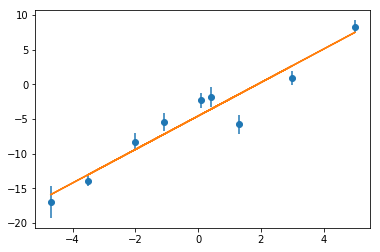

In [16]:
y_model = model(x_obs,np.mean(lista_m),np.mean(lista_b))
plt.errorbar(x_obs,y_obs, yerr=sigma_y_obs, fmt='o')
plt.plot(x_obs, y_model)

# Ejercicio 4.1

Ajuste la siguiente serie de datos a  un modelo cuadrático

<ErrorbarContainer object of 3 artists>

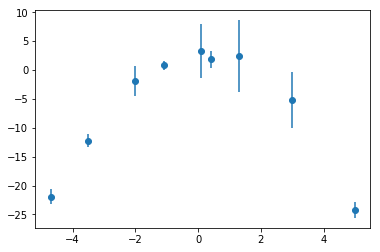

In [11]:
x = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
z = np.array([ -1.931,   2.38,   1.88,  -24.22,   3.31, -21.9,  -5.18, -12.23,   0.822])
sigma_z = ([ 2.63,  6.23, -1.461, 1.376, -4.72,  1.313, -4.886, -1.091,  0.8054])
plt.errorbar(x, z, yerr=sigma_z, fmt='o')